In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing the data

In [3]:
data = pd.read_csv("train.csv")
data

,Unnamed: 0,Completion_rate,Tuition_in_state,Tuition_out_state,Faculty_salary,Pell_grant_rate,SAT_average,ACT_50thPercentile,pct_White,pct_Black,pct_Hispanic,pct_Asian,Parents_middlesch,Parents_highsch,Parents_college
0,0,0.6552,33560.0,33560.0,4285.0,0.2531,1029.0,21.0,0.3771,0.0612,0.0590,0.1345,0.011561,0.226397,0.762042
1,1,0.5246,7383.0,18543.0,9148.0,0.4752,963.0,21.0,0.2866,0.0331,0.4212,0.1011,0.107411,0.375165,0.517424
2,2,0.4030,23144.0,23144.0,7232.0,0.4668,984.0,21.0,0.3085,0.1426,0.2309,0.0149,0.091241,0.361314,0.547445
3,3,0.5472,6610.0,17770.0,9284.0,0.6369,877.0,18.0,0.1272,0.0572,0.6282,0.0557,0.163236,0.433621,0.403142
4,4,0.8166,47004.0,47004.0,11984.0,0.1337,1323.0,30.0,0.4251,0.0786,0.2268,0.0549,0.014868,0.186091,0.799041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,2359,0.5311,24090.0,24090.0,6705.0,0.3402,949.0,20.0,0.6830,0.0544,0.0385,0.0225,0.019266,0.439450,0.541284
2360,2360,0.5371,36660.0,36660.0,6340.0,0.4075,1033.0,23.0,0.6215,0.1582,0.0883,0.0257,0.028593,0.404816,0.566591
2361,2361,0.3677,30331.0,30331.0,6689.0,0.5791,1009.0,22.0,0.5842,0.2277,0.0569,0.0221,0.029851,0.370421,0.599729
2362,2362,0.5541,5055.0,16215.0,9312.0,0.2151,1102.0,24.0,0.7347,0.0113,0.0718,0.0117,0.017512,0.259759,0.722729


Check Data to ensure completeness

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2364 non-null   int64  
 1   Completion_rate     2364 non-null   float64
 2   Tuition_in_state    2364 non-null   float64
 3   Tuition_out_state   2364 non-null   float64
 4   Faculty_salary      2364 non-null   float64
 5   Pell_grant_rate     2364 non-null   float64
 6   SAT_average         2364 non-null   float64
 7   ACT_50thPercentile  2364 non-null   float64
 8   pct_White           2364 non-null   float64
 9   pct_Black           2364 non-null   float64
 10  pct_Hispanic        2364 non-null   float64
 11  pct_Asian           2364 non-null   float64
 12  Parents_middlesch   2364 non-null   float64
 13  Parents_highsch     2364 non-null   float64
 14  Parents_college     2364 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 277.2 KB


In [5]:
data.isna().sum()

Unnamed: 0            0
Completion_rate       0
Tuition_in_state      0
Tuition_out_state     0
Faculty_salary        0
Pell_grant_rate       0
SAT_average           0
ACT_50thPercentile    0
pct_White             0
pct_Black             0
pct_Hispanic          0
pct_Asian             0
Parents_middlesch     0
Parents_highsch       0
Parents_college       0
dtype: int64

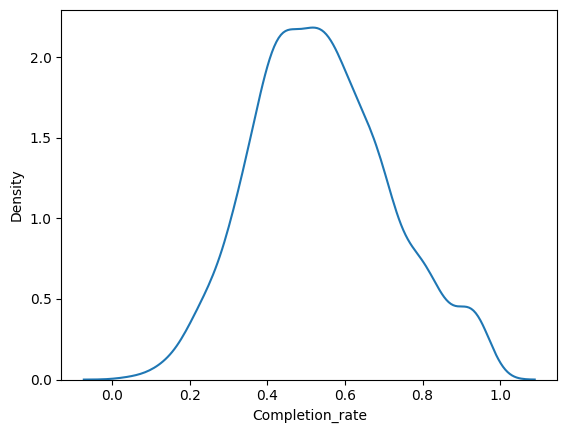

<Figure size 1500x700 with 0 Axes>

In [6]:
sns.kdeplot(data['Completion_rate'])
plt.figure(figsize=(15,7))
plt.show()

Check that the distribution of completion_rate feature is not weighted in anyway

### EDA and Data Preprocessing

Plot a scatterplot of each feature's relationship to completion rate. Identified that features such as tuition fees, faculty salary, Pell grant rate, SAT scores, and parents' education levels have a somewhat linear relationship to completion rate.

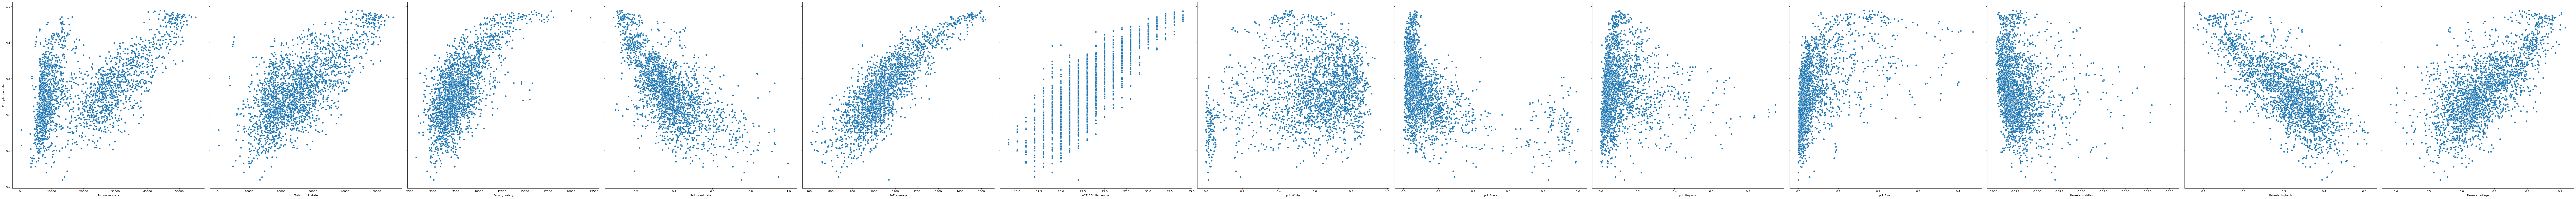

In [7]:
feature_names = data.columns.values[2:]
sns.pairplot(data, x_vars=feature_names, y_vars='Completion_rate', height=10)

Check for correlation of features

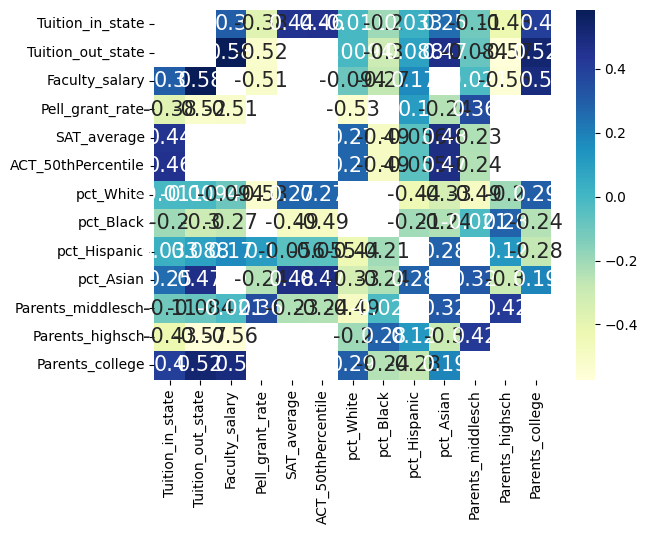

<Figure size 2000x1000 with 0 Axes>

In [8]:
features = data.drop(['Unnamed: 0', 'Completion_rate'], axis = 1)
sns.heatmap(features.corr()[np.abs(features.corr()) < 0.6],annot=True,annot_kws={'size':15},cmap="YlGnBu")
plt.figure(figsize=(20,10))
plt.show()

Based on the heatmap above, we should filter out features with high correlation to each other. Hence we will drop tuition_out_state and drop Parents_college. Choose one between pct_white and pct_black. And choose one between SAT_average and ACT_median

In [ ]:
features_selected = ['Tuition_in_state', 'Faculty_salary', 'Pell_grant_rate', 'SAT_average', 'pct_White', 'pct_Hispanic', 'pct_Asian', 'Parents_middlesch', 'Parents_highsch']

We then use Lasso regression to check for the significance of the features. We first run a search to find the best hyperparameter alpha for the lasso model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
y = data['Completion_rate']
X = data[features_selected]
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.1,10,0.1)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(X, y)
search.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.019 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.021 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.021 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.017 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.020 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.029 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.033 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.034 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.028 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.031 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.029 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

{'model__alpha': 0.1}

With alpha as 0.1, we then run the model to check for significance.

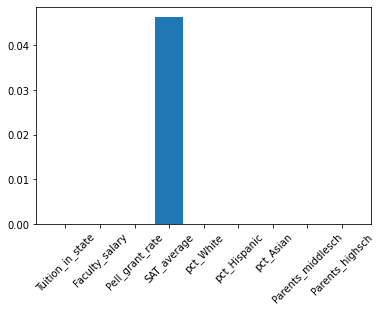

Tuition_in_state: 0.0000
Faculty_salary: 0.0000
Pell_grant_rate: -0.0000
SAT_average: 0.0463
pct_White: 0.0000
pct_Hispanic: 0.0000
pct_Asian: 0.0000
Parents_middlesch: -0.0000
Parents_highsch: -0.0000


In [ ]:
pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso(alpha = 0.1))])
lasso_coef = pipeline.fit(X, y).named_steps['model'].coef_
plt.bar(features_selected, lasso_coef)
plt.xticks(rotation=45)
plt.show()
for name, coef in zip(features_selected, lasso_coef):
  print(f'{name}: {coef:.4f}')

From the Lasso regression analysis, it appears that only SAT_average is a significant feature. However, if we build our model using only SAT, the R-squared score is low (0.693), suggesting that the model may be underfitted. Therefore, we will try to build our model with a few features.

In [ ]:
import statsmodels.formula.api as smf
features_selected = ['SAT_average']
model = smf.ols(formula='Completion_rate ~ SAT_average', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5320.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:33:14   Log-Likelihood:                 2148.4
No. Observations:                2364   AIC:                            -4293.
Df Residuals:                    2362   BIC:                            -4281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6192      0.016    -38.660      

### Creating regression model

Create a baseline regression model using OLS.

In [ ]:
features_selected = ['Tuition_in_state', 'Faculty_salary', 'Pell_grant_rate', 'SAT_average', 'pct_White', 'pct_Hispanic', 'pct_Asian', 'Parents_middlesch', 'Parents_highsch']
model = smf.ols(formula='Completion_rate ~ ' + ' + '.join(features_selected), data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     868.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:33:14   Log-Likelihood:                 2484.1
No. Observations:                2364   AIC:                            -4948.
Df Residuals:                    2354   BIC:                            -4890.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0267      0.03

Remove features with high P-values e.g. Pell_grant_rate, Parents_middlesch

In [ ]:
features_selected = ['Tuition_in_state', 'Faculty_salary', 'SAT_average', 'pct_White', 'pct_Hispanic', 'pct_Asian', 'Parents_highsch']
model2 = smf.ols(formula='Completion_rate ~ ' + ' + '.join(features_selected), data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:33:15   Log-Likelihood:                 2482.4
No. Observations:                2364   AIC:                            -4949.
Df Residuals:                    2356   BIC:                            -4903.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0601      0.030  

Check for linearity and heteroscedasticity by plotting residual values.

<AxesSubplot:>

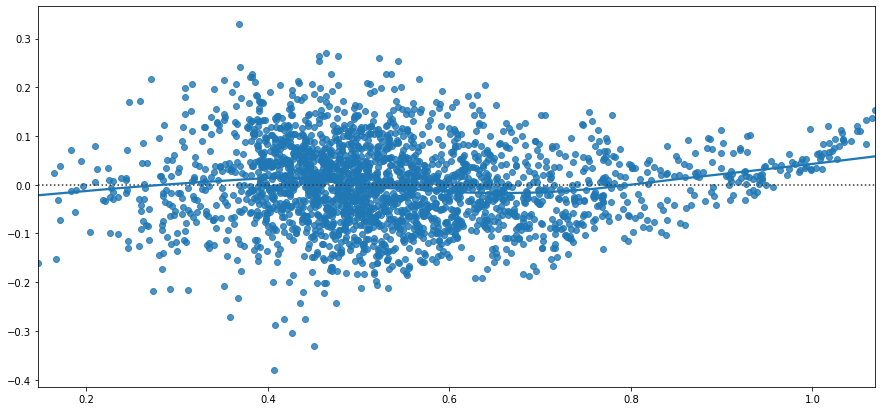

In [ ]:
y = data['Completion_rate']
X = data[features_selected]
pred_y = model2.predict(X) 
residuals = pred_y - y
plt.figure(figsize=(15,7))
sns.residplot(x = pred_y, y = residuals, lowess=True)

There is non-linearity and heteroscedasticity. Therefore, we adjust the model to be polynomial.

In [ ]:
poly_features = []
for feature in features_selected:
  poly_features.append(feature)
  poly_features.append(f'I({feature}**2)')
poly_model = smf.ols(formula='Completion_rate ~ ' + ' + '.join(poly_features), data=data).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     629.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:33:16   Log-Likelihood:                 2596.0
No. Observations:                2364   AIC:                            -5162.
Df Residuals:                    2349   BIC:                            -5076.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Remove variables with high P-values (e.g. SAT ** 2, pct_Hispanic ** 2, pct_Asian ** 2, Parents_highsch ** 2)

In [ ]:
poly_features = []
for feature in features_selected:
  poly_features.append(feature)
  if feature in ['Tuition_in_state', 'Faculty_salary', 'pct_White']:
    poly_features.append(f'I({feature}**2)')
poly_model2 = smf.ols(formula='Completion_rate ~ ' + ' + '.join(poly_features), data=data).fit()
print(poly_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Completion_rate   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     878.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:33:16   Log-Likelihood:                 2591.8
No. Observations:                2364   AIC:                            -5162.
Df Residuals:                    2353   BIC:                            -5098.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Model is now more linear, although still with some heteroscedasticity

<AxesSubplot:>

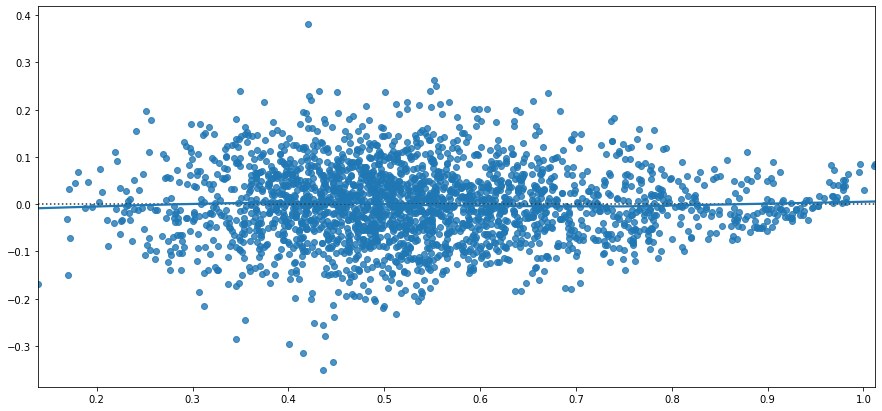

In [ ]:
pred_y = poly_model2.predict(X) 
residuals = pred_y - y
plt.figure(figsize=(15,7))
sns.residplot(x = pred_y, y = residuals, lowess=True)

Model is also now more linear, although still with some heteroscedasticity

### Creating our submission

In [ ]:
test = pd.read_csv("/kaggle/input/us-college-completion-rate-analysis/x_test.csv")
x_pred = test[features_selected]
y_pred = poly_model2.predict(x_pred)
y_pred

0       0.439902
1       0.471283
2       0.457351
3       0.432281
4       0.417905
          ...   
1160    0.510867
1161    0.492273
1162    0.556372
1163    0.507581
1164    0.645434
Length: 1165, dtype: float64

In [ ]:
submission = pd.DataFrame.from_dict({'Completion_rate': y_pred})
submission

,Completion_rate
0,0.439902
1,0.471283
2,0.457351
3,0.432281
4,0.417905
...,...
1160,0.510867
1161,0.492273
1162,0.556372
1163,0.507581


In [ ]:
submission.to_csv('submission.csv', index = True, index_label = "id") 

### To submit your submission

On the panel on your right, select the drop down "Submit to competition", and submit this notebook. Ensure that your submission is named ```submission.csv```!